# Camera Calibration
O objetivo desse trabalho é utilizar diversas maneiras de se realizar a calibração de câmera e comparar os resultados obtidos. Calibrar a câmera significa determinar os parametros intrisecos da mesma:
* focal length: `f`
* pixel size: `sx`, `sy`
* distortion coeficients: `k1`, `k2`...
* principal point: `cx`, `cy`

E os parâmetros extrínsecos:
* a matriz de translação `T`
* a matriz de rotação `R`

Serão usados três métodos distintos para obter esses parâmetros:
* Método Ingênuo
* Utilizando a ferramenta toolbox
* Método com a extração do autovetor usando a função SVD

## Método Ingênuo

### 1° passo
Take a awesome picture

* Distancia livro -> camera (dZ): 52 cm
* Comprimento livro (dX): 28,3 cm
* Largura livro (dY): 22 cm

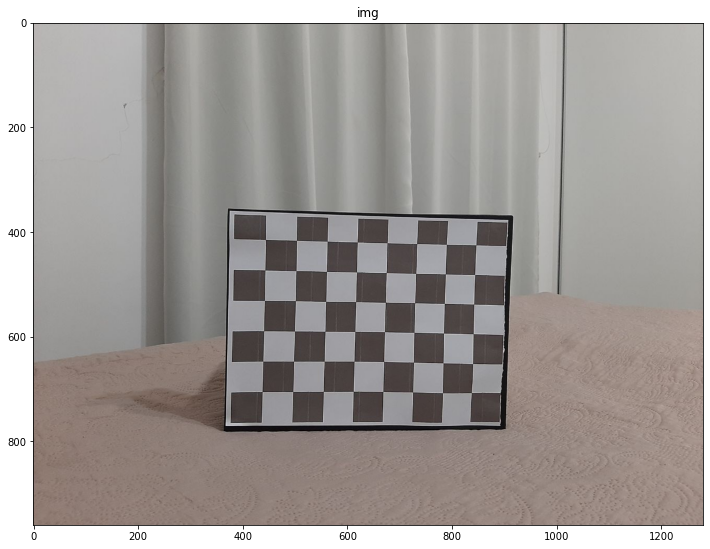

In [159]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('img2.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

* Comprimento do livro em pixels (dx): 543 pixels
* Largura do livro em pixels (dy): 423 pixels

Usando a equação de projeção perspectiva, é possível calcular a distancia focal tanto em x quanto em y. Para o cálculo de x temos que:

In [160]:
%%latex
\begin{equation}
f{x} = \frac{d{x}}{d{X}}*d{z}
\end{equation}

<IPython.core.display.Latex object>

Substituindo os valores encontrados:

In [161]:
%%latex
\begin{equation}
f{x} = \frac{543\hspace{1mm}px}{28,3\hspace{1mm}cm}*52\hspace{1mm}cm = 997,73\hspace{1mm}px
\end{equation}

<IPython.core.display.Latex object>

O mesmo para y:

In [162]:
%%latex
\begin{equation}
f{x} = \frac{d{y}}{d{Y}}*d{z} = \frac{423\hspace{1mm}px}{22\hspace{1mm}cm}*52\hspace{1mm}cm = 999,81\hspace{1mm}px
\end{equation}

<IPython.core.display.Latex object>

Como este é um método simplificado, é definido que os pontos centrais `cx` e `cy` são encontrados no centro da imagem. As dimensões da imagem são 1280 x 960 px. Portanto, a matriz de parametros intrisecos é tal que:

In [163]:
%%latex
\begin{equation}
M{int} = 
\begin{pmatrix}
f{x} & 0 & \frac{cols}{2} \\ 
0 & f{y} & \frac{rows}{2}\\ 
0 & 0 & 1
\end{pmatrix}
= 
\begin{pmatrix}
997,73 & 0 & \frac{1280}{2} \\ 
0 & 999,81 & \frac{960}{2}\\ 
0 & 0 & 1
\end{pmatrix}
=
\begin{pmatrix}
997,73 & 0 & 640 \\ 
0 & 999,81 & 480 \\ 
0 & 0 & 1
\end{pmatrix}
\end{equation}

<IPython.core.display.Latex object>

E então o método naive está concluido.

## Utilizando o toolbox
As fotos que serão usados para a calibração são as de um tabuleiro. Duas fotos são mostradas abaixo, mas no experimento foram utilizadas 9 fotos para uma maior precisão.

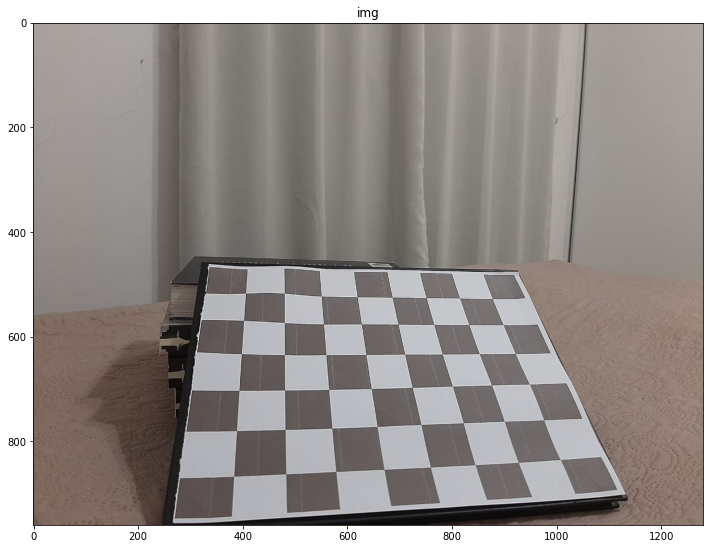

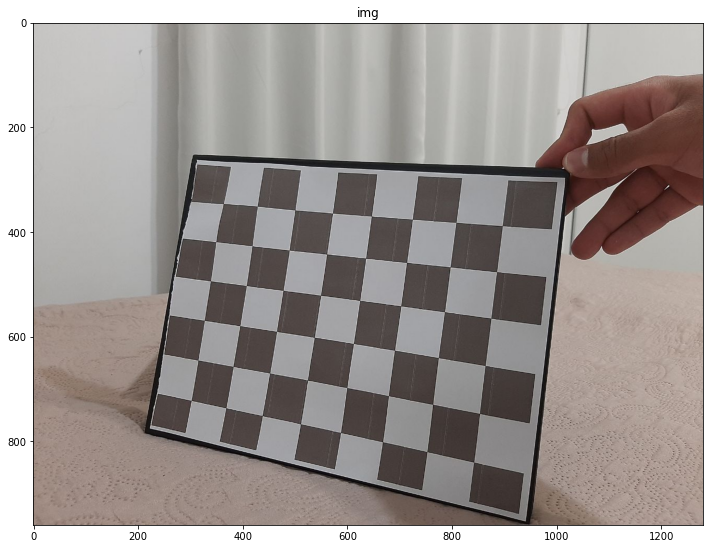

In [164]:
from matplotlib import pyplot as plt
import cv2

# Imagem 1
img = cv2.imread('board-photos/Image_5.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

# Imagem 2
img = cv2.imread('board-photos/Image_4.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

O tamanho de cada quadradinho do tabuleiro é de 30mm (dx e dy). Usando essa informação e com uma window size of the corner finder de 5 x 5, podemos começar a utilizar a ferramenta. O primeiro passo é adicionar todas as 9 fotos ao Octave:

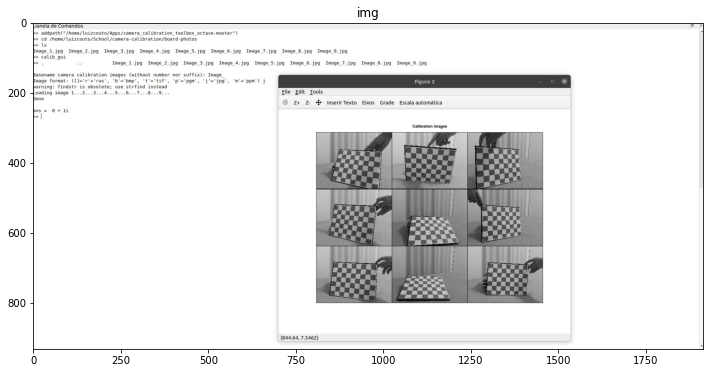

In [165]:
img = cv2.imread('steps-octave/step_1.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

Seguindo os passos do Octave, para cada foto são feitas algumas indicações para que o software localize os eixos de coordenadas:

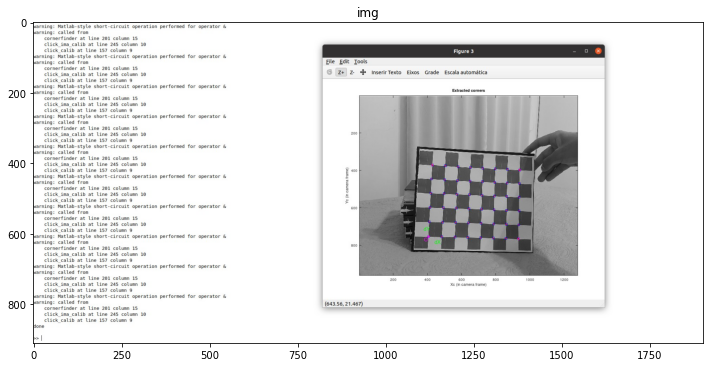

In [166]:
img = cv2.imread('steps-octave/step_2.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

Após isso, o próprio software calcula os parâmetros intrísecos da câmera:

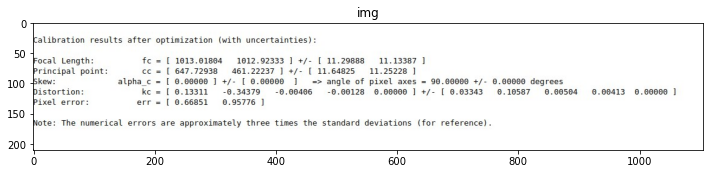

In [167]:
img = cv2.imread('steps-octave/step_3.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

Deixando os resultados mais claros, a matriz de parametros intrisecos calculada pelo Octave foi a seguinte:

In [168]:
%%latex
\begin{equation}
f{x} = 1013,01\hspace{1mm}px \pm 11,29
\end{equation}
\begin{equation}
f{y} = 1012,92\hspace{1mm}px \pm 11,13
\end{equation}
\begin{equation}
c{x} = 647,72\hspace{1mm}px \pm 11,64
\end{equation}
\begin{equation}
c{y} = 461,22\hspace{1mm}px \pm 11,25
\end{equation}
\begin{pmatrix}
1013,01 & 0 & 647,72 \\ 
0 & 1012,92 & 461,22 \\ 
0 & 0 & 1
\end{pmatrix}

<IPython.core.display.Latex object>

## Método utilizando a função SVD

Primeiramente, é tirada a foto:


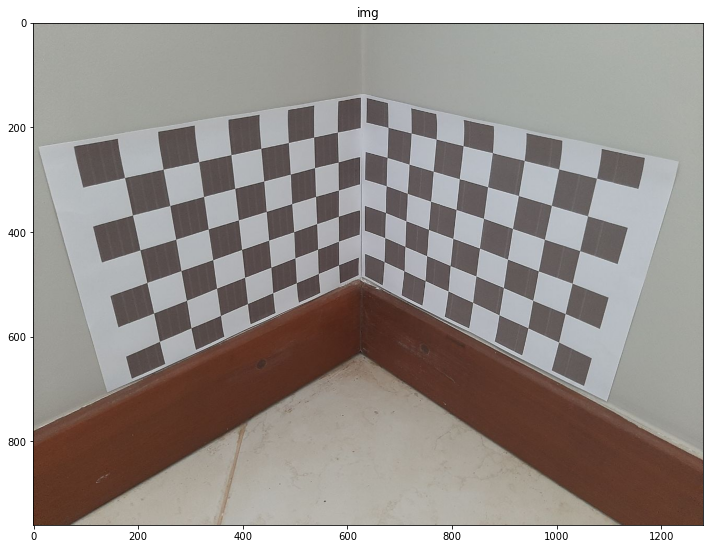

In [169]:
img = cv2.imread('step3_board.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

E então foram caculados 20 pontos no mundo, considerando a origem na quina superior direita do primeiro quadradinho da primeira coluna do board da esquerda. Os pontos medidos estão mostrados na imagem abaixo:

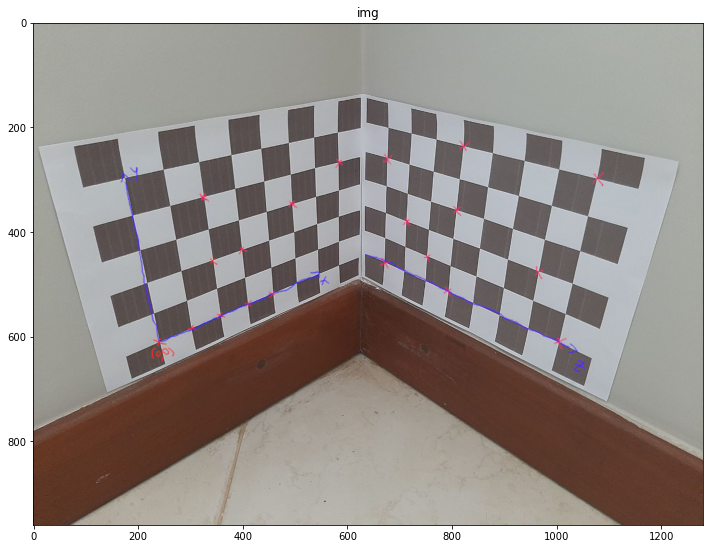

In [170]:
img = cv2.imread('step3_points.jpg')
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(RGB_im)
plt.title('img')
plt.show()

In [171]:
import numpy as np

number_of_points = 20

## alguns pequenos erros dos 10 ultimos pontos, que foram calculados no board
## que não tem a origem (o da direita)
offset_y = 7
offset_x = 5
offset_z = 5

world_points = np.array([
    [0,0,0],
    [30,0,0],
    [60,0,0],
    [90,0,0],
    [120,0,0],
    [60,60,0],
    [90,60,0],
    [150,90,0],
    [60,120,0],
    [210,120,0],
    [240,0,30],
    [240,60,60],
    [240,0,120],
    [240,30,90],
    [240,120,30],
    [240,90,120],
    [240,150,240],
    [240,60,210],
    [240,150,120],
    [240,0,240]
])

## adding the offsets
for idx, point in enumerate(world_points):
    if idx >= 9:
        point[0] = point[0] + offset_x
        point[1] = point[1] + offset_y
        point[2] = point[2] + offset_z


image_points = np.array([
    [242,610],
    [302,584],
    [359,561],
    [410,538],
    [459,518],
    [344,455],
    [399,435],
    [495,348],
    [327,334],
    [584,268],
    [672,458],
    [713,380],
    [794,514],
    [753,447],
    [677,260],
    [809,359],
    [1077,298],
    [966,476],
    [823,237],
    [1005,612]
])

Então, foi criada a matriz A com as coordenadas dos pontos obtidos:

In [172]:
## Criando a matriz A

A = np.empty((number_of_points, 8))
for idx in range(0, number_of_points):
    x_image = image_points[idx][0]
    y_image = image_points[idx][1]
    x_world = world_points[idx][0]
    y_world = world_points[idx][1]
    z_world = world_points[idx][2]
    
    A[idx] = [
         x_image*x_world,
         x_image*y_world,
         x_image*z_world,
         x_image,
         -1 * y_image * x_world,
         -1 * y_image * y_world,
         -1 * y_image * z_world,
         -1 * y_image 
    ]

Calculado o SVD da matriz A e retirada a última linha de Vt, que corresponde ao single value de menor valor em S:

In [173]:
# Calculando o SVD

U, S, Vt = np.linalg.svd(A, full_matrices=False)
last_line = Vt[len(Vt) - 1]
last_line
v = last_line

Com esse valores é possível calcular o valor de gama e alpha:

In [174]:
gama = np.sqrt(v[0]**2 + v[1]**2 + v[2]**2)
gama

0.003509160778151975

In [175]:
temp = np.sqrt(v[4]**2 + v[5]**2 + v[6]**2)
alpha = temp/gama
alpha

1.105805915317691

Com esses valores é possível construir a matriz R, que representa as rotações relacionadas aos valores extrínsecos:

In [176]:
## Calculando valores de R

r21 = v[0]/gama
r22 = v[1]/gama
r23 = v[2]/gama
Ty = v[3]/gama
r11 = v[4]/(alpha*gama)
r12 = v[5]/(alpha*gama)
r13 = v[6]/(alpha*gama)
Tx = v[7]/(alpha*gama)

R = np.array([
    [r11, r12, r13],
    [r21, r22, r23],
    [0, 0, 0]
])

R[2] = np.cross(R[0], R[1])
r31 = R[2][0]
r32 = R[2][1]
r33 = R[2][2]
R

array([[-0.95099679,  0.22689339, -0.21005833],
       [ 0.0254101 ,  0.99958196, -0.01379242],
       [ 0.20684111, -0.01845415, -0.95636462]])

In [177]:
## Check the sign (using the first point)
point_world = world_points[0]
point_image = image_points[0]

check_sign = point_image[0]*(r11*point_world[0] + r12*point_world[1] + r13*point_world[2] + Tx)
check_sign

-23074.936593629285

Como o valor foi negativo, podemos continuar sem fazer mudanças.

In [178]:
## Calculando M

M = np.empty((number_of_points, 2))
for idx in range(0, number_of_points):
    x_image = image_points[idx][0]
    y_image = image_points[idx][1]
    x_world = world_points[idx][0]
    y_world = world_points[idx][1]
    z_world = world_points[idx][2]

    M[idx] = np.array([x_image, (r11*x_world + r12*y_world + r13*z_world + Tx)])
M

array([[ 242.        ,  -95.35097766],
       [ 302.        , -123.88088128],
       [ 359.        , -152.41078491],
       [ 410.        , -180.94068854],
       [ 459.        , -209.47059216],
       [ 344.        , -138.79718178],
       [ 399.        , -167.3270854 ],
       [ 495.        , -217.58009109],
       [ 327.        , -125.18357865],
       [ 584.        , -272.05011866],
       [ 672.        , -334.10897843],
       [ 713.        , -326.79712518],
       [ 794.        , -353.01422808],
       [ 753.        , -339.90567663],
       [ 677.        , -306.88177217],
       [ 809.        , -332.59382338],
       [1077.        , -344.18721979],
       [ 966.        , -358.3058746 ],
       [ 823.        , -318.98022025],
       [1005.        , -378.22122761]])

In [179]:
## Calculate b
b = np.empty((number_of_points, 1))
for idx in range(0, number_of_points):
    x_image = image_points[idx][0]
    y_image = image_points[idx][1]
    x_world = world_points[idx][0]
    y_world = world_points[idx][1]
    z_world = world_points[idx][2]

    b[idx] = -1 * x_image * (r31*x_world + r32*y_world + r33*z_world)
b

array([[    -0.        ],
       [ -1873.98043335],
       [ -4455.35745413],
       [ -7632.43686431],
       [-11392.80819746],
       [ -3888.3067398 ],
       [ -6985.87174546],
       [-14535.81971143],
       [ -3334.08156467],
       [-21809.6771469 ],
       [-11473.81578294],
       [  9072.25269956],
       [ 54784.95586428],
       [ 30768.61238173],
       [-10059.97104747],
       [ 57163.58301772],
       [200893.4153223 ],
       [150868.67225246],
       [ 59064.0829145 ],
       [184681.25129238]])

In [180]:
## Calculando Tz e fx

tmp1 = np.matmul(M.transpose(), M)
tmp2 = np.linalg.inv(tmp1)
tmp3 = np.matmul(tmp2, M.transpose())
tmp4 = np.matmul(tmp3, b)

Tz = tmp4[0][0]
fx = tmp4[1][0]

print("Tz =", Tz)
print("fx =", fx)

Tz = 651.24631597272
fx = 1409.5468087032782


In [181]:
f_y = tmp4[1][0]/alpha
f_y

1274.6783040117166

In [182]:
T = np.array([
    Tx,
    Ty,
    Tz
])

Com isso, temos o valor de fx, da matriz de translação e da matriz de rotação do método utilizando a função SVD (método directive):

In [183]:
print("fx =", fx)
print("T =", T)
print("R =", R)

fx = 1409.5468087032782
T = [ -95.35097766 -264.73997072  651.24631597]
R = [[-0.95099679  0.22689339 -0.21005833]
 [ 0.0254101   0.99958196 -0.01379242]
 [ 0.20684111 -0.01845415 -0.95636462]]


## Análise dos resultados

Algumas das discussões já foram feitas durante a execução dos métodos, mas vale ressaltar alguns pontos.

Ao analisar os resultados, vemos que o valor obtido para a distância focal fx com o método ingenuo foi mais próxima do resultado do Octave daquela obtida com o método directive (que não utiliza suposições iniciais). Essa diferença pode ser explicada por algum erro no medição das coordenadas ou das distâncias. Talvez também por alguma configuração da câmera do celular que foi utilizado para tirar as fotos. Mesmo assim, os resultados não foram tão discrepantes, e o método Directive foi capaz de obter os parâmetros extrínsecos também (a matriz de rotação e translação). O método Ingênuo, já que supõe o centro de imagem e alguns otros valores, pode não ser tão confiável mas acabou por dar resultados bem próximos ao Octave. 